<a href="https://colab.research.google.com/github/felixzhao/stat501-project/blob/main/notebooks/2_1_FZ_registrations_per_goal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project"

Mounted at /content/drive
 CoachHandbook.docx	'Data Dictionary.gdoc'		   Texts.csv
 csv			 pre_process_round_1
'Data Dictionary.docx'	'Stats Consulting Data (1).xlsx'


In [5]:
table_name = "registrations_per_goal.csv"
root = "/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/csv"
table_path = os.path.join(root, table_name)
print(table_path)

/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/csv/registrations_per_goal.csv


In [8]:
def summary(df):
    print("Columns:")
    print(df.columns)

    # Display summary information
    print("Info:")
    print(df.info())

    # Display summary statistics
    print("Summary Statistics:")
    print(df.describe())

In [9]:
df = pd.read_csv(table_path)
summary(df)

<ipython-input-9-c16508073b13>:1: DtypeWarning: Columns (1,2,3,4,5,6,8,9,10,11,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(table_path)


Columns:
Index(['citizenId', 'lastActivity', 'type', 'category', 'startGoalDate',
       'endGoalDate', 'goalValue', 'goalFrequencyPerWeek', 'goalSubject',
       'goalDescription', 'firstRegistrationDateTime',
       'lastRegistrationDateTime', 'regCountExpected', 'registrationCount',
       'registrationTrue', 'registrationAboveGoalValue',
       'registrationBelowGoalValue', 'registrationValueAvg',
       'registrationValueMin', 'registrationValueMax', 'timeAggregation',
       'RegPercent', 'TrueRegPercent'],
      dtype='object')
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   citizenId                   1048575 non-null  int64  
 1   lastActivity                3404 non-null     object 
 2   type                        3404 non-null     object 
 3   category                    1151 non-nul

# format cols

In [10]:
# Convert columns with date information to datetime objects
df['lastActivity'] = pd.to_datetime(df['lastActivity'], errors='coerce')
df['startGoalDate'] = pd.to_datetime(df['startGoalDate'], errors='coerce')
df['endGoalDate'] = pd.to_datetime(df['endGoalDate'], errors='coerce')
df['firstRegistrationDateTime'] = pd.to_datetime(df['firstRegistrationDateTime'], errors='coerce')
df['lastRegistrationDateTime'] = pd.to_datetime(df['lastRegistrationDateTime'], errors='coerce')

# Convert object columns with categorical data to category data type
df['type'] = df['type'].astype('category')
df['category'] = df['category'].astype('category')
df['goalSubject'] = df['goalSubject'].astype('category')
df['goalDescription'] = df['goalDescription'].astype('category')
df['timeAggregation'] = df['timeAggregation'].astype('category')

# Convert object columns that should be numerical to float or integer
# If conversion fails, invalid parsing will be set as NaN
df['goalValue'] = pd.to_numeric(df['goalValue'], errors='coerce')
df['registrationValueAvg'] = pd.to_numeric(df['registrationValueAvg'], errors='coerce')
df['registrationValueMin'] = pd.to_numeric(df['registrationValueMin'], errors='coerce')
df['registrationValueMax'] = pd.to_numeric(df['registrationValueMax'], errors='coerce')


In [14]:
df.dtypes

citizenId                              int64
lastActivity                  datetime64[ns]
type                                category
category                            category
startGoalDate                 datetime64[ns]
endGoalDate                   datetime64[ns]
goalValue                            float64
goalFrequencyPerWeek                 float64
goalSubject                         category
goalDescription                     category
firstRegistrationDateTime     datetime64[ns]
lastRegistrationDateTime      datetime64[ns]
regCountExpected                     float64
registrationCount                    float64
registrationTrue                     float64
registrationAboveGoalValue           float64
registrationBelowGoalValue           float64
registrationValueAvg                 float64
registrationValueMin                 float64
registrationValueMax                 float64
timeAggregation                     category
RegPercent                           float64
TrueRegPer

In [13]:
df.head()

,citizenId,lastActivity,type,category,startGoalDate,endGoalDate,goalValue,goalFrequencyPerWeek,goalSubject,goalDescription,...,registrationCount,registrationTrue,registrationAboveGoalValue,registrationBelowGoalValue,registrationValueAvg,registrationValueMin,registrationValueMax,timeAggregation,RegPercent,TrueRegPercent
0,955397,2021-08-29 12:51:01,DIET_RULES,NaN,2021-08-12,NaT,NaN,7.0,Iron,Need to intake spinach,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,955397,2021-08-29 12:51:01,LIFE_RULES,NaN,2021-08-12,NaT,NaN,7.0,During pregnancy cravings,Having a bath\nHaving a sprite \nHaving an out...,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,955420,2021-11-11 08:01:41,DIET_RULES,NaN,2021-08-12,NaT,NaN,7.0,Food diary,Working out what spikes my sugars,...,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0
3,955420,2021-11-11 08:01:41,LIFE_RULES,NaN,2021-08-12,NaT,NaN,7.0,Stairs,Take the stairs instead of lift at work,...,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0
4,957973,2021-11-05 21:10:17,DIET_RULES,NaN,2021-08-16,NaT,NaN,4.0,Breakfast,High fibre ( 3 days a week ),...,38.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,83.0,83.0


# reg type analysis

In [19]:
# Assuming df is your DataFrame
unique_types = df['type'].unique()
print("Unique Types:")
print(unique_types)
print(len(unique_types))

type_counts = df['type'].value_counts()
print("Count of Each Unique Type:")
print(type_counts)

Unique Types:
['DIET_RULES', 'LIFE_RULES', 'MEDICINE', 'BREASTFEEDING', 'FASTING_BLOOD_SUGAR', ..., 'ALCOHOL', 'BLOOD_SUGAR', 'CIGARETTES', 'EXERCISE', NaN]
Length: 17
Categories (16, object): ['ALCOHOL', 'BLOOD_PRESSURE', 'BLOOD_SUGAR', 'BREASTFEEDING', ...,
                          'SLEEP', 'STEPS', 'WAIST_HIP', 'WEIGHT']
17
Count of Each Unique Type:
EXERCISE               1151
DIET_RULES              759
WEIGHT                  440
LIFE_RULES              413
STEPS                   304
SLEEP                    95
MOOD                     71
MEDICINE                 62
PAIN                     31
BLOOD_PRESSURE           21
BREASTFEEDING            16
FASTING_BLOOD_SUGAR      15
WAIST_HIP                10
ALCOHOL                   6
CIGARETTES                6
BLOOD_SUGAR               4
Name: type, dtype: int64


In [20]:
unique_citi = df['citizenId'].unique()
print(f"there are {len(unique_citi)} unique citizen has reg types")

there are 362 unique citizen has reg types


In [21]:
# Group by 'citizenId' and count distinct 'type'
count_by_citizen = df.groupby('citizenId')['type'].nunique().reset_index(name='distinct_type_count')

# Sort by count
sorted_count = count_by_citizen.sort_values(by='distinct_type_count', ascending=False)

# Display sorted counts
print(sorted_count)

     citizenId  distinct_type_count
76      920115                   13
142     966345                   13
201     996130                   12
12      831841                   11
185     987689                   10
..         ...                  ...
1       810359                    1
346    1092017                    1
217    1000132                    1
56      906476                    1
0            0                    0

[362 rows x 2 columns]


<ipython-input-22-67c178e59709>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sorted_count['distinct_type_count'], shade=True)


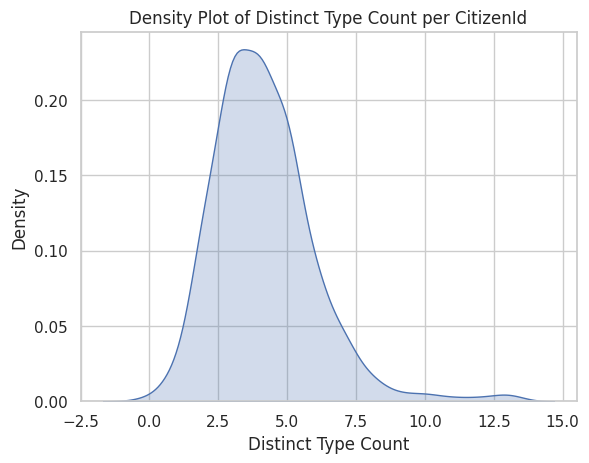

In [22]:
# Plot
sns.set(style="whitegrid")
sns.kdeplot(sorted_count['distinct_type_count'], shade=True)
plt.xlabel('Distinct Type Count')
plt.ylabel('Density')
plt.title('Density Plot of Distinct Type Count per CitizenId')
plt.show()

In [23]:
# Get the count of citizenId for each distinct distinct_type_count
citizen_count_by_distinct_type = sorted_count['distinct_type_count'].value_counts().reset_index().sort_values(by='index')
citizen_count_by_distinct_type.columns = ['distinct_type_count', 'citizenId_count']

# Display
print(citizen_count_by_distinct_type)

    distinct_type_count  citizenId_count
13                    0                1
6                     1                8
3                     2               47
0                     3               88
1                     4               84
2                     5               71
4                     6               32
5                     7               17
7                     8                6
10                    9                2
9                    10                2
12                   11                1
11                   12                1
8                    13                2


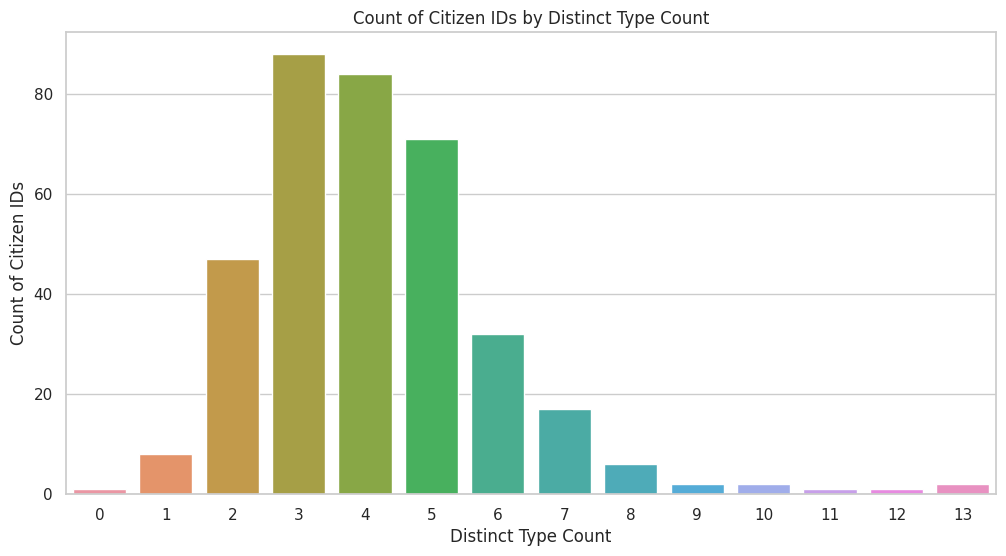

In [24]:
# Set up the visual appearance
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='distinct_type_count', y='citizenId_count', data=citizen_count_by_distinct_type)

# Add labels and title
plt.xlabel('Distinct Type Count')
plt.ylabel('Count of Citizen IDs')
plt.title('Count of Citizen IDs by Distinct Type Count')

# Show the plot
plt.show()